In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import torch
from PIL import Image
import numpy as np
from torch.utils.data import Dataset
from pycocotools.coco import COCO

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(device)
"""
Output must be--> device(type='cuda')
"""

cuda


"\nOutput must be--> device(type='cuda')\n"

In [ ]:
 #Custom PyTorch Dataset to load COCO-format annotations and images
class CocoDetectionDataset(Dataset):
    # Init function: loads annotation file and prepares list of image IDs
    def __init__(self, image_dir, annotation_path, transforms=None):
        self.image_dir = image_dir
        self.coco = COCO(annotation_path)
        self.image_ids = list(self.coco.imgs.keys())
        self.transforms = transforms

    # Returns total number of images
    def __len__(self):
        return len(self.image_ids)

    # Fetches a single image and its annotations
    def __getitem__(self, idx):
        image_id = self.image_ids[idx]
        image_info = self.coco.loadImgs(image_id)[0]
        image_path = os.path.join(self.image_dir, image_info['file_name'])
        image = Image.open(image_path).convert("RGB")

        # Load all annotations for this image
        annotation_ids = self.coco.getAnnIds(imgIds=image_id)
        annotations = self.coco.loadAnns(annotation_ids)

        # Extract bounding boxes and labels from annotations
        boxes = []
        labels = []
        for obj in annotations:
            xmin, ymin, width, height = obj['bbox']
            xmax = xmin + width
            ymax = ymin + height
            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(obj['category_id'])

        # Convert annotations to PyTorch tensors
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        area = torch.as_tensor([obj['area'] for obj in annotations],    dtype=torch.float32)
        iscrowd = torch.as_tensor([obj.get('iscrowd', 0) for obj in annotations], dtype=torch.int64)

        # Package everything into a target dictionary
        target = {
            "boxes": boxes,
            "labels": labels,
            "image_id": image_id,
            "area": area,
            "iscrowd": iscrowd
        }

        # Apply transforms if any were passed
        if self.transforms:
            image = self.transforms(image)

        return image, target


In [ ]:
 #Custom PyTorch Dataset to load COCO-format annotations and images
class CocoDetectionDataset(Dataset):
    # Init function: loads annotation file and prepares list of image IDs
    def __init__(self, image_dir, annotation_path, transforms=None):
        self.image_dir = image_dir
        self.coco = COCO(annotation_path)
        self.image_ids = list(self.coco.imgs.keys())
        self.transforms = transforms

    # Returns total number of images
    def __len__(self):
        return len(self.image_ids)

    # Fetches a single image and its annotations
    def __getitem__(self, idx):
        image_id = self.image_ids[idx]
        image_info = self.coco.loadImgs(image_id)[0]
        image_path = os.path.join(self.image_dir, image_info['file_name'])
        image = Image.open(image_path).convert("RGB")

        # Load all annotations for this image
        annotation_ids = self.coco.getAnnIds(imgIds=image_id)
        annotations = self.coco.loadAnns(annotation_ids)

        # Extract bounding boxes and labels from annotations
        boxes = []
        labels = []
        for obj in annotations:
            xmin, ymin, width, height = obj['bbox']
            xmax = xmin + width
            ymax = ymin + height
            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(obj['category_id'])

        # Convert annotations to PyTorch tensors
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        area = torch.as_tensor([obj['area'] for obj in annotations],    dtype=torch.float32)
        iscrowd = torch.as_tensor([obj.get('iscrowd', 0) for obj in annotations], dtype=torch.int64)

        # Package everything into a target dictionary
        target = {
            "boxes": boxes,
            "labels": labels,
            "image_id": image_id,
            "area": area,
            "iscrowd": iscrowd
        }

        # Apply transforms if any were passed
        if self.transforms:
            image = self.transforms(image)

        return image, target


In [ ]:
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from pycocotools.coco import COCO
import os
import torch
from PIL import Image
import numpy as np
from torch.utils.data import Dataset


# Custom PyTorch Dataset to load COCO-format annotations and images
class CocoDetectionDataset(Dataset):
    # Init function: loads annotation file and prepares list of image IDs
    def __init__(self, image_dir, annotation_path, transforms=None):
        self.image_dir = image_dir
        self.coco = COCO(annotation_path)
        self.image_ids = list(self.coco.imgs.keys())
        self.transforms = transforms

    # Returns total number of images
    def __len__(self):
        return len(self.image_ids)

    # Fetches a single image and its annotations
    def __getitem__(self, idx):
        image_id = self.image_ids[idx]
        image_info = self.coco.loadImgs(image_id)[0]
        image_path = os.path.join(self.image_dir, image_info['file_name'])
        image = Image.open(image_path).convert("RGB")

        # Load all annotations for this image
        annotation_ids = self.coco.getAnnIds(imgIds=image_id)
        annotations = self.coco.loadAnns(annotation_ids)

        # Extract bounding boxes and labels from annotations
        boxes = []
        labels = []
        for obj in annotations:
            xmin, ymin, width, height = obj['bbox']
            xmax = xmin + width
            ymax = ymin + height
            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(obj['category_id'])

        # Convert annotations to PyTorch tensors
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        area = torch.as_tensor([obj['area'] for obj in annotations],    dtype=torch.float32)
        iscrowd = torch.as_tensor([obj.get('iscrowd', 0) for obj in annotations], dtype=torch.int64)

        # Package everything into a target dictionary
        target = {
            "boxes": boxes,
            "labels": labels,
            "image_id": image_id,
            "area": area,
            "iscrowd": iscrowd
        }

        # Apply transforms if any were passed
        if self.transforms:
            image = self.transforms(image)

        return image, target


# Transform PIL image --> PyTorch tensor
def get_transform():
    return ToTensor()

# Load training dataset
train_dataset = CocoDetectionDataset(
    image_dir="/content/drive/MyDrive/polyp_detection.v4i.coco/train",
    annotation_path="/content/drive/MyDrive/polyp_detection.v4i.coco/train/_annotations.coco.json",
    transforms=get_transform()
)

# Load validation dataset
val_dataset = CocoDetectionDataset(
    image_dir="/content/drive/MyDrive/polyp_detection.v4i.coco/valid",
    annotation_path="/content/drive/MyDrive/polyp_detection.v4i.coco/valid/_annotations.coco.json",
    transforms=get_transform()
)

# Load dataset with DataLoaders, you can change batch_size
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

loading annotations into memory...
Done (t=1.11s)
creating index...
index created!
loading annotations into memory...
Done (t=0.68s)
creating index...
index created!


In [ ]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torchvision

# Load a pre-trained Faster R-CNN model with ResNet50 backbone and FPN, , you change this
model =torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# Number of classes in the dataset (including background)
# +1 for bg class
num_classes = len(train_dataset.coco.getCatIds()) + 1

# Number of input features for the classifier head
in_features = model.roi_heads.box_predictor.cls_score.in_features

"""
Number of classes must be equal to your label number
"""
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Move the model to the GPU for faster training
model.to(device)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


100%|██████████| 160M/160M [00:00<00:00, 175MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
# Get parameters that require gradients (the model's trainable parameters)
params = [p for p in model.parameters() if p.requires_grad]

# Define the optimizer SGD(Stochastic Gradient Descent)
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)


In [ ]:
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/utils.py
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_eval.py
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_utils.py
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/transforms.py

--2025-09-07 10:22:38--  https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4063 (4.0K) [text/plain]
Saving to: ‘engine.py’

engine.py           100%[===================>]   3.97K  --.-KB/s    in 0s      

2025-09-07 10:22:38 (60.9 MB/s) - ‘engine.py’ saved [4063/4063]

--2025-09-07 10:22:38--  https://raw.githubusercontent.com/pytorch/vision/main/references/detection/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8388 (8.2K) [text/plain]
S

In [ ]:
from engine import train_one_epoch, evaluate
import utils

In [ ]:
import sys
sys.path.append('/content/vision')

In [ ]:
from engine import train_one_epoch, evaluate

# Number of epochs for training
num_epochs = 25

# Loop through each epoch
for epoch in range(num_epochs):
    print(f"\nEpoch {epoch + 1}/{num_epochs}")

    # Train the model for one epoch, printing status every 25 iterations
    train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq=25)  # Using train_loader for training

    # Evaluate the model only on the validation dataset, not training
    evaluate(model, val_loader, device=device)  # Using val_loader for evaluation

    # save the model after each epoch
    torch.save(model.state_dict(), f"model_epoch_{epoch + 1}.pth")


Epoch 1/25


/content/engine.py:30: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):


Epoch: [0]  [   0/1050]  eta: 1:20:56  lr: 0.000010  loss: 1.3034 (1.3034)  loss_classifier: 1.0646 (1.0646)  loss_box_reg: 0.2280 (0.2280)  loss_objectness: 0.0039 (0.0039)  loss_rpn_box_reg: 0.0069 (0.0069)  time: 4.6250  data: 1.6596  max mem: 1644
Epoch: [0]  [  25/1050]  eta: 0:32:59  lr: 0.000135  loss: 0.5490 (0.7693)  loss_classifier: 0.3738 (0.5893)  loss_box_reg: 0.1176 (0.1478)  loss_objectness: 0.0119 (0.0256)  loss_rpn_box_reg: 0.0068 (0.0065)  time: 1.7612  data: 1.4018  max mem: 1802
Epoch: [0]  [  50/1050]  eta: 0:30:18  lr: 0.000260  loss: 0.2732 (0.5447)  loss_classifier: 0.1234 (0.3664)  loss_box_reg: 0.1402 (0.1457)  loss_objectness: 0.0059 (0.0264)  loss_rpn_box_reg: 0.0041 (0.0061)  time: 1.7104  data: 1.3524  max mem: 1802
Epoch: [0]  [  75/1050]  eta: 0:28:50  lr: 0.000385  loss: 0.2559 (0.4746)  loss_classifier: 0.1108 (0.2892)  loss_box_reg: 0.1458 (0.1583)  loss_objectness: 0.0082 (0.0214)  loss_rpn_box_reg: 0.0031 (0.0058)  time: 1.6810  data: 1.3199  max me

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


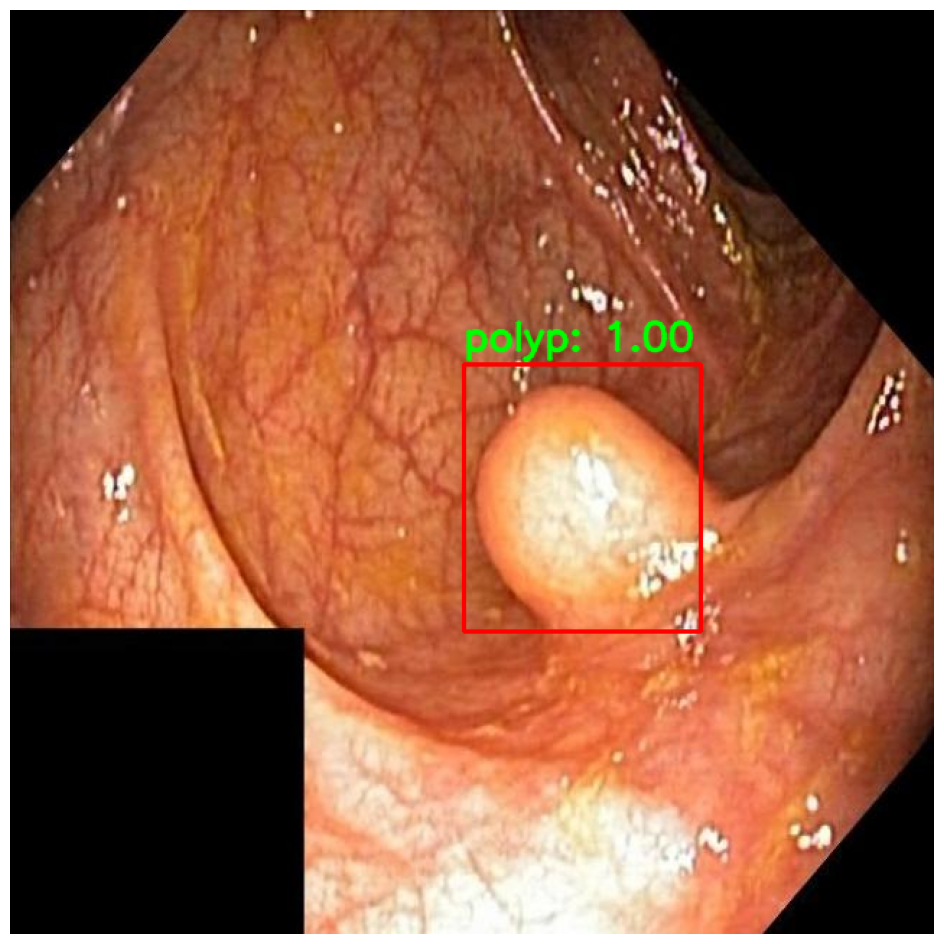

In [ ]:
from torchvision import models, transforms

# class names
label_list= ["polyp"]

# Number of classes (include background)
# In cell DdFaoD_RM_1m, the model was trained with num_classes = len(train_dataset.coco.getCatIds()) + 1.
# Assuming len(train_dataset.coco.getCatIds()) is 2 (polyp + background), the number of classes should be 3.
num_classes = 3 # Corrected number of classes

# Load a pre-trained Faster R-CNN model with ResNet50 backbone and FPN, but without pre-trained weights for the new head
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=False, num_classes=num_classes)

# Load trained Faster R-CNN model
model.load_state_dict(torch.load(r"/content/model_epoch_25.pth"))
model.eval()

# Load image with OpenCV and convert to RGB
img_path = r"/content/drive/MyDrive/polyp_detection.v4i.coco/valid/polyp-165-_jpg.rf.14f584be1cdfaa20294b28708ef3d682.jpg" # CHANGE this to your image path
image_bgr = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
image_pil = Image.fromarray(image_rgb)


transform = transforms.Compose([transforms.ToTensor()])
image_tensor = transform(image_pil).unsqueeze(0)

# Inference
with torch.no_grad():
    predictions = model(image_tensor)

# detection data
boxes = predictions[0]['boxes']
labels = predictions[0]['labels']
scores = predictions[0]['scores']

"""
Higher threshold give you more accurate detections,
but number of predictions is reduced; there is a simple trade-off
"""
threshold = 0.8
for i in range(len(boxes)):
    if scores[i] > threshold:
        box = boxes[i].cpu().numpy().astype(int)
        # Assuming that label 1 corresponds to 'polyp'.
        # You might need to adjust this based on your dataset's category IDs.
        if labels[i] == 1:
            label = label_list[0] # Use the first (and only) element of label_list
            score = scores[i].item()

            text = f"{label}: {score:.2f}"
            cv2.putText(image_bgr, text, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX,
                        0.9, (0, 255, 0), 2, cv2.LINE_AA)

            # Draw bbox and label
            cv2.rectangle(image_bgr, (box[0], box[1]), (box[2], box[3]), (0, 0, 255), 2)


# Convert BGR --> RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image with larger figure size
plt.figure(figsize=(16, 12))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [ ]:
import torch

# Assuming get_model_instance_segmentation is defined in a previous cell
# Load your model definition again
model = get_model_instance_segmentation(num_classes)
model.load_state_dict(torch.load("/content/model_epoch_25.pth"))
model.to(device) # Ensure the model is on the correct device
model.eval()

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torchvision

def get_model_instance_segmentation(num_classes):
    # Load a pre-trained Faster R-CNN model with ResNet50 backbone and FPN
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

    # Get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # Replace the pre-trained head with a new one that has the num_classes we want
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

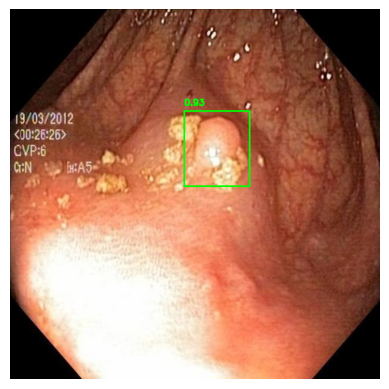

In [ ]:
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import cv2

# Path to test image
img_path = "/content/drive/MyDrive/polyp_detection.v4i.coco/test/polyp-101-_jpg.rf.a39e9b6e93f5d026d372871050bf4d16.jpg"

# Preprocess
transform = T.Compose([T.ToTensor()])
img = Image.open(img_path).convert("RGB")
img_tensor = transform(img).to(device) # Move the image tensor to the same device as the model

# Run model
with torch.no_grad():
    prediction = model([img_tensor])

# Extract boxes, scores, labels
boxes = prediction[0]['boxes'].cpu().numpy()
scores = prediction[0]['scores'].cpu().numpy()
labels = prediction[0]['labels'].cpu().numpy()

# Draw results
img_cv = cv2.imread(img_path)
for box, score in zip(boxes, scores):
    if score > 0.5:  # confidence threshold
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(img_cv, (x1,y1), (x2,y2), (0,255,0), 2)
        cv2.putText(img_cv, f"{score:.2f}", (x1,y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [ ]:
from engine import evaluate

# Reload model for a specific epoch
model.load_state_dict(torch.load("/content/model_epoch_25.pth"))
model.to(device)
model.eval()

# Evaluate on validation/test dataset
evaluate(model, data_loader_test, device=device)


NameError: name 'data_loader_test' is not defined

In [ ]:
# Assuming you have a test dataset in a similar structure as train and validation
# Define the test dataset and DataLoader
test_dataset = CocoDetectionDataset(
    image_dir="/content/drive/MyDrive/polyp_detection.v4i.coco/test", # Replace with the actual path to your test images
    annotation_path="/content/drive/MyDrive/polyp_detection.v4i.coco/test/_annotations.coco.json", # Replace with the actual path to your test annotations
    transforms=get_transform()
)

# Load test dataset with DataLoader
data_loader_test = DataLoader(test_dataset, batch_size=1, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [ ]:
import torch
import matplotlib.pyplot as plt
from engine import evaluate

# Paths
ckpt_dir = "/content/"

# Containers for results
epochs = []
map_scores = []
precision_scores = []
recall_scores = []

for epoch in range(1, 26):  # since you trained 25 epochs
    path = f"{ckpt_dir}/model_epoch_{epoch}.pth"
    print(f"Evaluating {path} ...")

    # Load model
    model = get_model_instance_segmentation(num_classes)
    model.load_state_dict(torch.load(path, map_location=device))
    model.to(device)
    model.eval()

    # Evaluate
    coco_eval = evaluate(model, data_loader_test, device=device)
    stats = coco_eval.coco_eval['bbox'].stats  # array of 12 COCO metrics

    # Store results
    epochs.append(epoch)
    map_scores.append(stats[0])       # mAP@[0.5:0.95]
    precision_scores.append(stats[1]) # AP@0.5
    recall_scores.append(stats[8])    # AR@1 (recall)

Evaluating /content//model_epoch_1.pth ...


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


creating index...
index created!
Test:  [  0/100]  eta: 0:00:13  model_time: 0.1257 (0.1257)  evaluator_time: 0.0012 (0.0012)  time: 0.1371  data: 0.0089  max mem: 1804
Test:  [ 99/100]  eta: 0:00:00  model_time: 0.0734 (0.0747)  evaluator_time: 0.0010 (0.0011)  time: 0.0856  data: 0.0093  max mem: 1804
Test: Total time: 0:00:08 (0.0866 s / it)
Averaged stats: model_time: 0.0734 (0.0747)  evaluator_time: 0.0010 (0.0011)
Accumulating evaluation results...
DONE (t=0.02s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.500
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.798
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.509
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.207
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.525
 Average Recall     (AR) @[

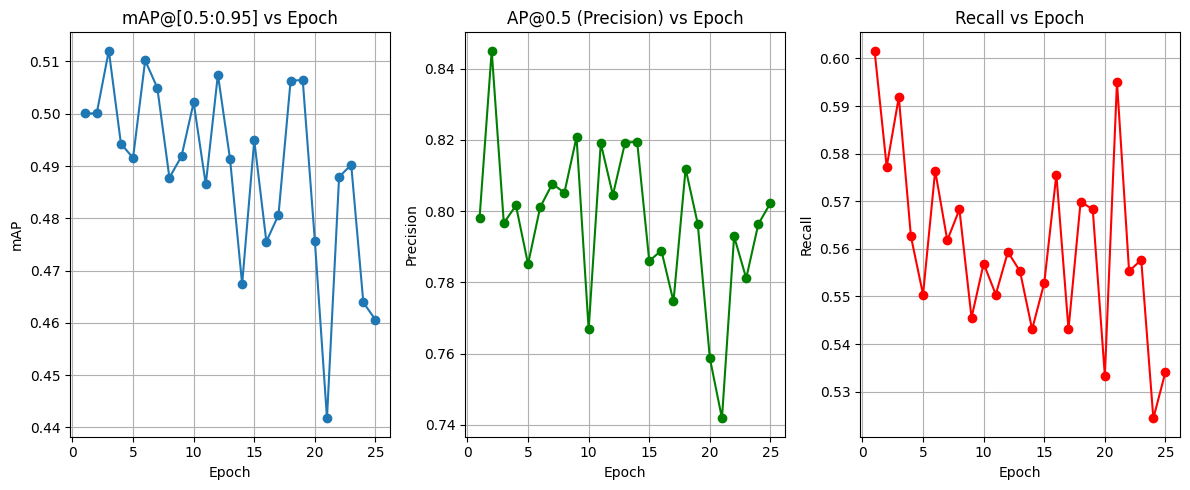

In [ ]:
plt.figure(figsize=(12, 5))

# mAP plot
plt.subplot(1, 3, 1)
plt.plot(epochs, map_scores, marker='o')
plt.title("mAP@[0.5:0.95] vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("mAP")
plt.grid(True)

# Precision (AP50) plot
plt.subplot(1, 3, 2)
plt.plot(epochs, precision_scores, color='green', marker='o')
plt.title("AP@0.5 (Precision) vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.grid(True)

# Recall plot
plt.subplot(1, 3, 3)
plt.plot(epochs, recall_scores, color='red', marker='o')
plt.title("Recall vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import torch
import numpy as np
from engine import evaluate

# Load best model (example: epoch 25)
model = get_model_instance_segmentation(num_classes)
model.load_state_dict(torch.load("/content/model_epoch_25.pth"))
model.to(device)
model.eval()


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score, average_precision_score
import matplotlib.pyplot as plt

y_true = []
y_scores = []

# Collect predictions on validation set
with torch.no_grad():
    for images, targets in data_loader_test:
        images = [img.to(device) for img in images]
        outputs = model(images)

        for output, target in zip(outputs, targets):
            gt_labels = target['labels'].cpu().numpy()
            preds = output['scores'].cpu().numpy()  # prediction confidences
            pred_labels = output['labels'].cpu().numpy()

            # binary: 1 = polyp detected, 0 = background
            y_true.extend([1]*len(gt_labels))
            y_scores.extend(preds)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def compute_iou(box1, box2):
    """Compute IoU between two boxes: box=[x1,y1,x2,y2]."""
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    inter = max(0, x2-x1) * max(0, y2-y1)
    area1 = (box1[2]-box1[0]) * (box1[3]-box1[1])
    area2 = (box2[2]-box2[0]) * (box2[3]-box2[1])
    union = area1 + area2 - inter
    return inter / union if union > 0 else 0

def evaluate_detection(model, dataloader, device, iou_thresh=0.5):
    model.eval()
    y_true = []
    y_scores = []

    with torch.no_grad():
        for images, targets in dataloader:
            images = [img.to(device) for img in images]
            outputs = model(images)

            for output, target in zip(outputs, targets):
                gt_boxes = target['boxes'].cpu().numpy()
                pred_boxes = output['boxes'].cpu().numpy()
                pred_scores = output['scores'].cpu().numpy()

                matched = set()
                for score, pbox in zip(pred_scores, pred_boxes):
                    # Match prediction with highest IoU
                    best_iou, best_gt = 0, -1
                    for i, gt in enumerate(gt_boxes):
                        if i in matched:
                            continue
                        iou = compute_iou(pbox, gt)
                        if iou > best_iou:
                            best_iou, best_gt = iou, i
                    if best_iou >= iou_thresh:
                        y_true.append(1)   # TP
                        matched.add(best_gt)
                    else:
                        y_true.append(0)   # FP
                    y_scores.append(score)

                # Any GT not matched is a FN
                for i in range(len(gt_boxes)):
                    if i not in matched:
                        y_true.append(1)   # GT present
                        y_scores.append(0) # no prediction → 0 confidence

    return np.array(y_true), np.array(y_scores)


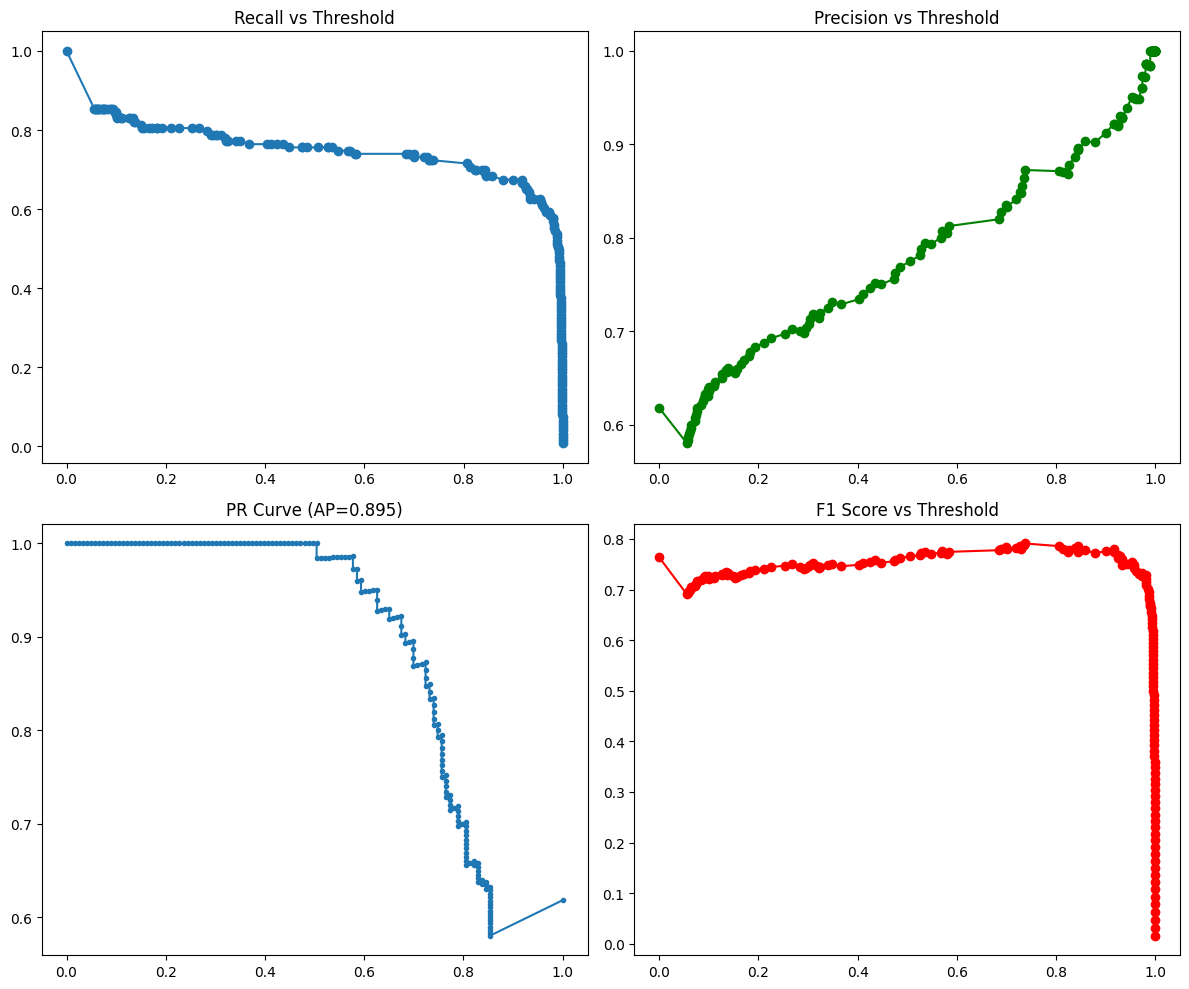

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Run evaluation
y_true, y_scores = evaluate_detection(model, data_loader_test, device, iou_thresh=0.5)

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
ap = average_precision_score(y_true, y_scores)

# Plot curves
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
plt.plot(thresholds, recall[:-1], marker='o')
plt.title("Recall vs Threshold")

plt.subplot(2,2,2)
plt.plot(thresholds, precision[:-1], marker='o', color="green")
plt.title("Precision vs Threshold")

plt.subplot(2,2,3)
plt.plot(recall, precision, marker='.')
plt.title(f"PR Curve (AP={ap:.3f})")

plt.subplot(2,2,4)
plt.plot(thresholds, f1_scores[:-1], marker='o', color="red")
plt.title("F1 Score vs Threshold")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def compute_iou(box1, box2):
    """Compute IoU between two boxes: box=[x1,y1,x2,y2]."""
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    inter = max(0, x2-x1) * max(0, y2-y1)
    area1 = (box1[2]-box1[0]) * (box1[3]-box1[1])
    area2 = (box2[2]-box2[0]) * (box2[3]-box2[1])
    union = area1 + area2 - inter
    return inter / union if union > 0 else 0

def compute_confusion_matrix(model, dataloader, device, iou_thresh=0.5, conf_thresh=0.5):
    model.eval()
    TP, FP, FN = 0, 0, 0

    with torch.no_grad():
        for images, targets in dataloader:
            images = [img.to(device) for img in images]
            outputs = model(images)

            for output, target in zip(outputs, targets):
                gt_boxes = target['boxes'].cpu().numpy()
                pred_boxes = output['boxes'].cpu().numpy()
                pred_scores = output['scores'].cpu().numpy()

                # Filter predictions by confidence threshold
                confident_preds_indices = pred_scores >= conf_thresh
                confident_pred_boxes = pred_boxes[confident_preds_indices]
                confident_pred_scores = pred_scores[confident_preds_indices]


                matched = set()
                for score, pbox in zip(confident_pred_scores, confident_pred_boxes):
                    best_iou, best_gt = 0, -1
                    for i, gt in enumerate(gt_boxes):
                        if i in matched:
                            continue
                        iou = compute_iou(pbox, gt)
                        if iou > best_iou:
                            best_iou, best_gt = iou, i
                    if best_iou >= iou_thresh:
                        TP += 1
                        matched.add(best_gt)
                    else:
                        FP += 1
                FN += len(gt_boxes) - len(matched)

    cm = np.array([[TP, FP],
                   [FN, 0]])  # TN not used in detection
    return cm

In [ ]:
def compute_confusion_matrix(model, dataloader, device, iou_thresh=0.5, conf_thresh=0.5):
    model.eval()
    TP, FP, FN = 0, 0, 0

    with torch.no_grad():
        for images, targets in dataloader:
            images = [img.to(device) for img in images]
            outputs = model(images)

            for output, target in zip(outputs, targets):
                gt_boxes = target['boxes'].cpu().numpy()
                pred_boxes = output['boxes'].cpu().numpy()
                pred_scores = output['scores'].cpu().numpy()

                # ✅ Filter by confidence threshold
                keep = pred_scores >= conf_thresh
                pred_boxes = pred_boxes[keep]
                pred_scores = pred_scores[keep]

                matched = set()
                for score, pbox in zip(pred_scores, pred_boxes):
                    best_iou, best_gt = 0, -1
                    for i, gt in enumerate(gt_boxes):
                        if i in matched:
                            continue
                        iou = compute_iou(pbox, gt)
                        if iou > best_iou:
                            best_iou, best_gt = iou, i
                    if best_iou >= iou_thresh:
                        TP += 1
                        matched.add(best_gt)
                    else:
                        FP += 1

                # Unmatched GTs → FN
                FN += len(gt_boxes) - len(matched)

    cm = np.array([[TP, FP],
                   [FN, 0]])  # TN usually ignored in detection
    return cm


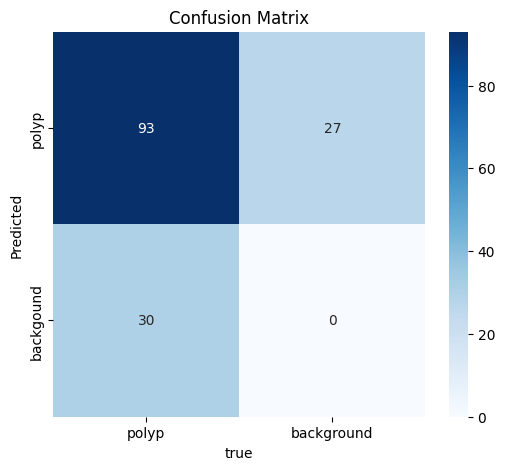

Confusion Matrix:
 [[93 27]
 [30  0]]


In [ ]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["polyp", "background"],
                yticklabels=["polyp", "backgound"])
    plt.title("Confusion Matrix")
    plt.ylabel("Predicted")
    plt.xlabel("true")
    plt.show()

# Example usage
cm = compute_confusion_matrix(model, data_loader_test, device, iou_thresh=0.5, conf_thresh=0.5)
plot_confusion_matrix(cm)
print("Confusion Matrix:\n", cm)


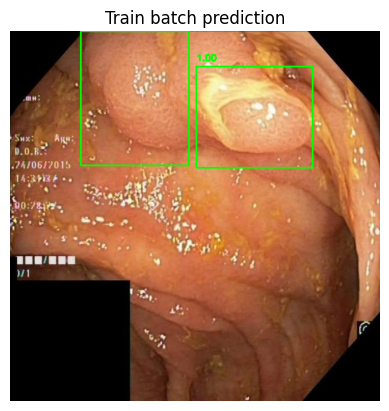

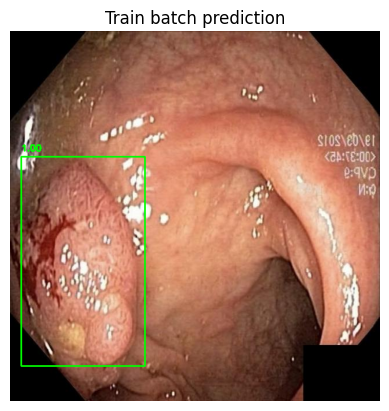

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Get one batch from training loader
images, targets = next(iter(train_loader))

images = [img.to(device) for img in images]
model.eval()

with torch.no_grad():
    outputs = model(images)

# Visualize results
for i in range(len(images)):
    img = images[i].permute(1,2,0).cpu().numpy()
    img = (img * 255).astype('uint8')
    img_cv = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    boxes = outputs[i]['boxes'].cpu().numpy()
    scores = outputs[i]['scores'].cpu().numpy()

    for box, score in zip(boxes, scores):
        if score > 0.5:  # confidence threshold
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(img_cv, (x1,y1), (x2,y2), (0,255,0), 2)
            cv2.putText(img_cv, f"{score:.2f}", (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

    plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Train batch prediction")
    plt.show()

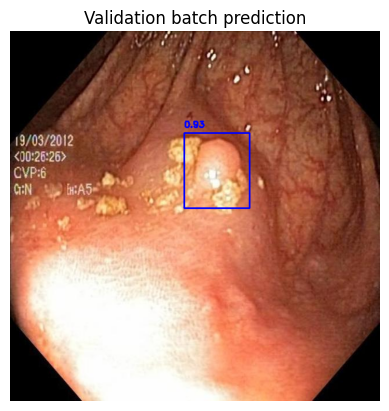

In [ ]:
# Get one batch from validation loader
images, targets = next(iter(data_loader_test))

images = [img.to(device) for img in images]
model.eval()

with torch.no_grad():
    outputs = model(images)

# Visualize results
for i in range(len(images)):
    img = images[i].permute(1,2,0).cpu().numpy()
    img = (img * 255).astype('uint8')
    img_cv = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    boxes = outputs[i]['boxes'].cpu().numpy()
    scores = outputs[i]['scores'].cpu().numpy()

    for box, score in zip(boxes, scores):
        if score > 0.5:  # confidence threshold
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(img_cv, (x1,y1), (x2,y2), (255,0,0), 2)
            cv2.putText(img_cv, f"{score:.2f}", (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)

    plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Validation batch prediction")
    plt.show()
